## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

###### Adding seed to replicate the runs

In [2]:
np.random.seed(5)

## Reading Training Data

In [3]:
df = pd.read_csv("train.csv")

## Data Exploration

In [4]:
#Description of the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000,11238.000000
mean,0.611518,0.716246,3.811176,200.930415,3.487720,0.145666,0.238032,0.020911
std,0.247939,0.170822,1.234581,49.876282,1.462832,0.352787,0.425898,0.143093
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#data head
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.10,0.90,7,286,4,0,1,0,sales,low
1,0.89,0.93,4,249,3,0,0,0,sales,low
2,0.38,0.50,2,132,3,0,1,0,accounting,low
3,0.95,0.71,4,151,4,0,0,0,sales,medium
4,0.84,0.84,5,163,3,0,0,0,technical,low


In [6]:

df.sales.unique()

array(['sales', 'accounting', 'technical', 'management', 'IT',
       'product_mng', 'marketing', 'RandD', 'support', 'hr'], dtype=object)

In [7]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df.Work_accident.unique()

array([0, 1])

In [9]:
df.promotion_last_5years.unique()

array([0, 1])

In [10]:
## Correlation
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.103987,-0.149692,-0.018551,-0.096347,0.053734,-0.390102,0.029255
last_evaluation,0.103987,1.000000,0.356582,0.340095,0.130931,-0.002148,0.002976,-0.007091
number_project,-0.149692,0.356582,1.000000,0.423956,0.196756,-0.012442,0.023205,-0.008879
average_montly_hours,-0.018551,0.340095,0.423956,1.000000,0.132538,-0.014212,0.070709,-0.005195
time_spend_company,-0.096347,0.130931,0.196756,0.132538,1.000000,0.002518,0.144461,0.062660
Work_accident,0.053734,-0.002148,-0.012442,-0.014212,0.002518,1.000000,-0.152015,0.033086
left,-0.390102,0.002976,0.023205,0.070709,0.144461,-0.152015,1.000000,-0.062699
promotion_last_5years,0.029255,-0.007091,-0.008879,-0.005195,0.062660,0.033086,-0.062699,1.000000


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


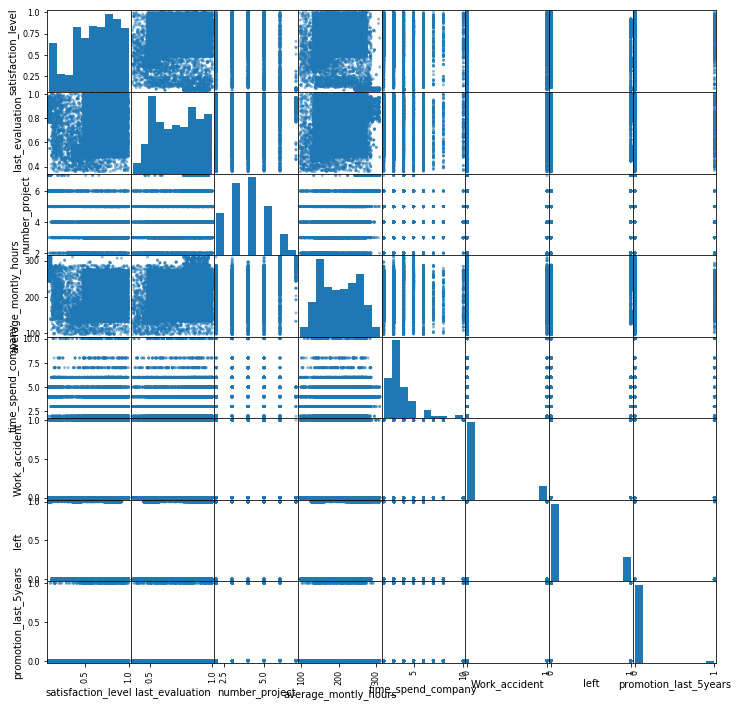

In [11]:
### Scatter plot for correlation
pd.scatter_matrix(df, figsize=(12, 12))
plt.show()

In [12]:
# df1 = df[['Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']]
df1 = df.copy()

In [13]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.10,0.90,7,286,4,0,1,0,sales,low
1,0.89,0.93,4,249,3,0,0,0,sales,low
2,0.38,0.50,2,132,3,0,1,0,accounting,low
3,0.95,0.71,4,151,4,0,0,0,sales,medium
4,0.84,0.84,5,163,3,0,0,0,technical,low


In [14]:
df1.sales.unique()

array(['sales', 'accounting', 'technical', 'management', 'IT',
       'product_mng', 'marketing', 'RandD', 'support', 'hr'], dtype=object)

## Factorizing columns(encoding strings to integers)

### Factorizing sales

In [15]:
labels, uniques = pd.factorize(df1['sales'])
df1['sales_factorized'] = labels
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_factorized
0,0.10,0.90,7,286,4,0,1,0,sales,low,0
1,0.89,0.93,4,249,3,0,0,0,sales,low,0
2,0.38,0.50,2,132,3,0,1,0,accounting,low,1
3,0.95,0.71,4,151,4,0,0,0,sales,medium,0
4,0.84,0.84,5,163,3,0,0,0,technical,low,2


In [16]:
## Unique values in sales
uniques

Index(['sales', 'accounting', 'technical', 'management', 'IT', 'product_mng',
       'marketing', 'RandD', 'support', 'hr'],
      dtype='object')

### Factorizing salary

In [17]:
## Unique values in salary
df1.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [18]:
## Mapping string to integers
salary_mapper = {'high':2 , 'medium': 1, 'low': 0}

In [19]:
df1['salary_factorized'] = df1['salary']
df1['salary_factorized'] = df1['salary_factorized'].replace(salary_mapper)
df1.salary_factorized.unique()

array([0, 1, 2])

In [20]:
#check for NULL values
df.isnull().values.any()

False

In [21]:
# checking df1
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_factorized,salary_factorized
0,0.10,0.90,7,286,4,0,1,0,sales,low,0,0
1,0.89,0.93,4,249,3,0,0,0,sales,low,0,0
2,0.38,0.50,2,132,3,0,1,0,accounting,low,1,0
3,0.95,0.71,4,151,4,0,0,0,sales,medium,0,1
4,0.84,0.84,5,163,3,0,0,0,technical,low,2,0


In [22]:
# Dropping columns
df1 = df1.drop(columns=['sales', 'salary'])
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_factorized,salary_factorized
0,0.10,0.90,7,286,4,0,1,0,0,0
1,0.89,0.93,4,249,3,0,0,0,0,0
2,0.38,0.50,2,132,3,0,1,0,1,0
3,0.95,0.71,4,151,4,0,0,0,0,1
4,0.84,0.84,5,163,3,0,0,0,2,0


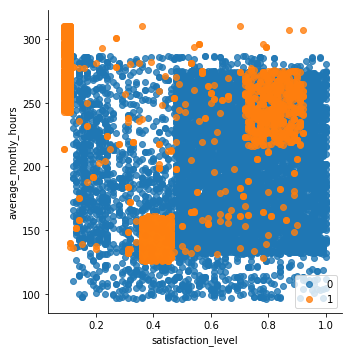

In [65]:
sns.lmplot( x="satisfaction_level", y="average_montly_hours", data=df, fit_reg=False, hue='left', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

## Splitting data into train(80%) and validation(20%)

In [25]:
def splitData(X ,Y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    return (X_train, X_test, y_train, y_test)

In [26]:
# df1[df1.columns.values != 'left']
df1.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'sales_factorized',
       'salary_factorized'], dtype=object)

In [27]:
X_train, X_val, y_train, y_val = splitData(df1.iloc[:,df1.columns != 'left'], df1['left'], test_size=0.2)

In [28]:
X_train['left'] = y_train
X_val['left'] = y_val

In [29]:
X_train.promotion_last_5years.unique()

array([0, 1])

# Building Decision Tree

## Utility Functions

In [30]:
## Calculating Entropy for a list of given probabilities
def entropy(probs):
#     print("IN ENTROPY")
    x = sum( [-prob*math.log2(prob) for prob in probs])
    return x

In [31]:
## Calculating Entropy for a list of given probabilities
def gini(probs):
#     print("IN GINI")
    x = sum( [prob*prob for prob in probs])
    return 1-x

In [32]:
## Calculating Entropy for a list of given probabilities
def misclassification(probs):
#     print("IN MISCLASSIFICATION")
#     print("length: {0}".format(len(probs)))
    x = max(probs)
    return 1-x

In [33]:
## Calculating entropy of a column in a dataframe
def metric_of_col(df, target, metric):
    val_frequency = df[target].value_counts().to_dict()
    total_count = len(df.index)*1.0
    base_probs = [freq/total_count for key, freq in val_frequency.items()]
    return metric(base_probs)

In [34]:
## Calculating Information gain for a column n a dataframe
def eval_metric_gain(df, col, target, metric):
    val_frequency = df[target].value_counts().to_dict()
    total_count = len(df.index)*1.0
#     base_probs = [freq/total_count for key, freq in val_frequency.items()]
    base_entropy = metric_of_col(df,target, metric)
#     print("base: {0}".format(base_entropy))
    new_entropy = 0
    for val, data in df.groupby(col):
        new_entropy += len(data.index)/total_count*metric_of_col(data,target, metric)
    return base_entropy - new_entropy

In [35]:
## Dividing the dataframe based on the value in the column
def divideSet(df, column, value):
    df1 = df.loc[df.iloc[:,column] <= value] #For values <= value
    df2 = df.loc[df.iloc[:,column] > value] #For values > value
    return (df1, df2)

In [36]:
## PrOrder print of tree
def preorder(root, level, counts):
    if(root.terminal):
        counts[root.node_id] += 1
        print("\t"*level+ str(root.node_id))
        return
    print("\t"*level + root.node_id + " split val: " + str(root.split_val))
    for k, value in root.children.items():
        print("\t"*level, str(k), end = "")
        preorder(value, level+1, counts)

In [37]:
# print metrics
def print_metrics(Y_predict, Y_test):
    accuracy = metrics.accuracy_score(Y_predict,Y_test)
    precision = metrics.precision_score(Y_predict,Y_test,pos_label=1)
    recall = metrics.recall_score(Y_predict,Y_test,pos_label=1)
    f1_score = metrics.f1_score(Y_predict,Y_test,pos_label=1)

    print("Accuracy : " +str(accuracy))
    print("Precision : " +str(precision))
    print("recall : " +str(recall))
    print("f1 Score : " +str(f1_score))
    print()


In [38]:
# print metrics
def calc_metrics(Y_predict, Y_test):
    accuracy = metrics.accuracy_score(Y_predict,Y_test)
    precision = metrics.precision_score(Y_predict,Y_test,pos_label=1)
    recall = metrics.recall_score(Y_predict,Y_test,pos_label=1)
    f1_score = metrics.f1_score(Y_predict,Y_test,pos_label=1)
    return [accuracy, precision, recall, f1_score]

In [39]:
def count_nodes(root):
    if(root.terminal):
        return 1
    sum = 0
    for r in root.children.values():
        sum += count_nodes(r)
    return sum

In [40]:
def predict(model,model_args,X):
    model.test(X, 'left_predict')
    pred = X['left_predict'].copy()
    return pred

## Node Class

In [41]:
class Node:
    def __init__(self, name, terminal, type_ = 'c', split = 0):
        self.node_id = name ##Name of the splitting attribute when terimal = False, else output class of the leaf
        self.terminal = terminal ## If the node is leaf or not
        self.children = {} ## Node Children
        self.node_type = type_ ## Node type, 'c' for categorical, 'i' for numerical
        self.split_val = split ## Split value (used only for numerical data)
        self.IG = 0 ## Information gain at the node

## Decision Tree Class

In [42]:
class DecisionTree:
    def __init__(self, data, attributes_left, cont_attributes_left, target, metric = entropy, max_depth = 1000):
        self.attributes = attributes_left
        self.depth = 0
        self.root = self.BuildTree(data, attributes_left.copy(), cont_attributes_left, target, metric, max_depth, 1)
        
    def BuildTree(self, df, attributes_left, cont_attributes_left, target, metric, max_depth, depth):
        node_type = None
        val_frequency = df[target].value_counts().to_dict()
        val_keys = list(val_frequency.keys())
        if(len(val_keys) == 1):
            return Node(val_keys[0], True)
        if((len(attributes_left) == 0 and len(cont_attributes_left) == 0) or depth == max_depth):
            v=list(val_frequency.values())
            k=list(val_frequency.keys())
            max_index = v.index(max(v))
            max_val = k[max_index]
            return Node(max_val, True)

        IG_max = None
        if(len(attributes_left) > 0):
            node_type = 'c'
            IG_list = [eval_metric_gain(df, attr, target, metric) for attr in attributes_left if attr != target]
            IG_max = max(IG_list)
            IG_index = IG_list.index(max(IG_list))
            split_val = 0.0
            split_attr = attributes_left[IG_index]
        
        bestSets = None
        currentScore = metric_of_col(df, target, metric)
        columnCount = len(df.columns) - 1  # last column is the result/target column
        for col in range(0, columnCount):
            if df.columns[col] not in cont_attributes_left:
                continue
            #unique values
            lsUnique = list(set(np.unique(df.iloc[:,col])))
            lsUnique.sort()
            for value in lsUnique:
                (set1, set2) = divideSet(df, col, value)
                # Gain -- Entropy or Gini
                if(len(set1)==0 or len(set2)==0):
                    continue
                p = float(len(set1)) / len(df)
                gain = currentScore - p*metric_of_col(set1, target, metric) - (1-p)*metric_of_col(set2, target, metric)
                if((gain>IG_max if IG_max is not None else True) and len(set1)>0 and len(set2)>0):
                    IG_max = gain
                    split_val = value
                    split_attr = df.columns[col]
                    node_type = 'i'
                    bestSets = (set1, set2)         
                    bestAttribute = (col, value)
                    
        if(IG_max is None):
            v=list(val_frequency.values())
            k=list(val_frequency.keys())
            max_index = v.index(max(v))
            max_val = k[max_index]
            return Node(max_val, True)
        
        if node_type == 'c':
            x = attributes_left.copy()
            x.remove(split_attr)
            root = Node(split_attr, False)
            for val, data in df.groupby(split_attr):
                root.children[val] = self.BuildTree(data, x, cont_attributes_left, target, metric, max_depth, depth+1)
            return root
        else:
            root = Node(split_attr, False, node_type, split_val)
            root.children[0] = self.BuildTree(bestSets[0], attributes_left, cont_attributes_left, target, metric, max_depth, depth+1)
            root.children[1] = self.BuildTree(bestSets[1], attributes_left, cont_attributes_left, target, metric, max_depth, depth+1)
            return root

    def predict(self, root, row):
        if(root.terminal):
            return root.node_id
        if(root.node_type == 'c'):
            if(math.isfinite(row[root.node_id]) and root.children.get(row[root.node_id], -1) != -1):
                return self.predict(root.children[row[root.node_id]], row)
            else:
                counts = defaultdict(int)
                for val in root.children.values():
                    self.getClassCounts(val, row, counts)
                v=list(counts.values())
                k=list(counts.keys())
                max_index = v.index(max(v))
                max_val = k[max_index]
                return max_val
        else:
            if(math.isfinite(row[root.node_id])):
                if(row[root.node_id] <= root.split_val):
                    return self.predict(root.children[0], row)
                else:
                    return self.predict(root.children[1], row)
            else:
                counts = defaultdict(int)
                for val in root.children.values():
                    self.getClassCounts(val, row, counts)
                v=list(counts.values())
                k=list(counts.keys())
                max_index = v.index(max(v))
                max_val = k[max_index]
                return max_val                
    
    def test(self, df, predict_column):
        for index, row in df.iterrows():
            df.at[index,predict_column] = self.predict(self.root, row)
    
    def calcError(self, df, target, predicted):
        df['square_error'] = pow(df[predicted]-df[target],2)
        error = sum(df['square_error'])/len(df.index.values)
    
    def getClassCounts(self, root, row, counts):
        if(root.terminal):
            counts[root.node_id] += 1
            return
        if(math.isfinite(row[root.node_id]) and root.children.get(row[root.node_id], -1) != -1):
            self.getClassCounts(root.children[row[root.node_id]], row, counts)
            return
        else:
            for val in root.children.values():
                self.getClassCounts(val, row, counts)
            return

# PART - 1 Categorical Decision Tree

In [69]:
categorical_features = ['Work_accident', 'promotion_last_5years', 'sales_factorized', 'salary_factorized']
numerical_features = []
metric = entropy
dtree = DecisionTree(X_train, categorical_features, numerical_features, 'left', metric=metric)
X_train.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_factorized,salary_factorized,left
count,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000
mean,0.611449,0.716423,3.814683,200.962180,3.487430,0.148721,0.020356,3.473081,0.593103,0.238042
std,0.248699,0.170804,1.231347,49.888677,1.461642,0.355833,0.141223,3.111260,0.638406,0.425909
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


### PreOrder Print of the decision Tree

In [70]:
counts = defaultdict(int) ##Counting number of '0' and '1'
preorder(dtree.root, 0, counts)
cnt = Counter(x for x in df1['left'])
print(counts)

salary_factorized split val: 0
 0	Work_accident split val: 0
	 0		sales_factorized split val: 0
		 0			promotion_last_5years split val: 0
			 0				0
			 1				0
		 1			promotion_last_5years split val: 0
			 0				0
		 2			promotion_last_5years split val: 0
			 0				0
			 1				0
		 3			promotion_last_5years split val: 0
			 0				0
			 1				1
		 4			promotion_last_5years split val: 0
			 0				0
			 1				1
		 5			promotion_last_5years split val: 0
			 0				0
		 6			promotion_last_5years split val: 0
			 0				0
			 1				0
		 7			promotion_last_5years split val: 0
			 0				0
			 1				0
		 8			promotion_last_5years split val: 0
			 0				0
			 1				0
		 9			promotion_last_5years split val: 0
			 0				0
			 1				0
	 1		sales_factorized split val: 0
		 0			promotion_last_5years split val: 0
			 0				0
			 1				1
		 1			0
		 2			promotion_last_5years split val: 0
			 0				0
			 1				0
		 3			promotion_last_5years split val: 0
			 0				0
			 1				0
		 4			promotion_last_5years split val: 0
			 0			

### Predict on validation set

In [71]:
## column1 for datafram, column2 - to store predicted values
y_pred = predict(dtree, None, X_val)
# dtree.test(X_val, 'left_predict')

In [72]:
X_val.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_factorized,salary_factorized,left,left_predict,square_error
7603,0.64,0.64,3,180,2,1,0,0,0,0,0.0,0.0
789,0.73,0.97,5,217,6,0,0,8,1,1,0.0,1.0
3804,0.71,1.00,3,181,4,0,0,2,1,0,0.0,0.0
1440,0.69,0.97,5,105,4,0,0,0,0,0,0.0,0.0
1449,0.98,0.83,5,211,3,0,0,8,1,0,0.0,0.0


In [73]:
X_val.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_factorized,salary_factorized,left,left_predict,square_error
10451,0.59,0.79,4,181,3,0,0,7,1,0,0.0,0.0
6035,0.43,0.45,2,146,3,0,0,4,1,1,0.0,1.0
688,0.52,0.54,4,212,3,0,0,4,0,0,0.0,0.0
5909,0.63,0.50,3,140,2,0,0,0,2,0,0.0,0.0
2367,0.37,0.47,2,149,3,0,0,4,1,1,0.0,1.0


In [74]:
X_val['left_predict'].value_counts().to_dict()

{0.0: 2246, 1.0: 2}

In [75]:
X_val['square_error'] = pow(y_pred-X_val['left'],2)

In [76]:
sum(X_val['square_error'])/len(X_val.index.values)
cnt = Counter(x for x in X_val['left_predict'])
print(cnt)

Counter({0.0: 2246, 1.0: 2})


### Printing my decison tree performance metrics

In [77]:
print_metrics(y_pred,X_val['left'])

Accuracy : 0.7629003558718861
Precision : 0.003738317757009346
recall : 1.0
f1 Score : 0.0074487895716946



## Scikit learn

### Training the decision Tree

In [78]:
import sklearn
from sklearn import tree
cols = categorical_features + numerical_features
X = X_train[cols]
Y = X_train['left']
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, Y)

### Testing the Scikit learn model on validation set

In [79]:
temp = clf.predict(X_val[cols])
ct = Counter(x for x in temp)
print(ct) ## Printing number of '0' and '1's predictions

Counter({0: 2247, 1: 1})


### Printing the performance metrics of Scikit learn model

In [80]:
print_metrics(temp, X_val['left'])

Accuracy : 0.7624555160142349
Precision : 0.001869158878504673
recall : 1.0
f1 Score : 0.0037313432835820895



### Printing the scikit learn decision Tree

In [81]:
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True,
#                 special_characters=True) 
# graph = graphviz.Source(dot_data) 
# graph

# PART - 2 Categorical + Numerical Decision Tree

In [82]:
categorical_features = ['Work_accident', 'promotion_last_5years', 'sales_factorized', 'salary_factorized']
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',  'average_montly_hours', 'time_spend_company']
metric = entropy
dtree = DecisionTree(X_train, categorical_features, numerical_features, 'left', metric)

### PreOrder Print of the decision Tree

In [83]:
counts = defaultdict(int) ##Counting number of '0' and '1'
preorder(dtree.root, 0, counts)
cnt = Counter(x for x in df1['left'])
print(counts)

satisfaction_level split val: 0.46
 0	satisfaction_level split val: 0.11
	 0		1
	 1		number_project split val: 2
		 0			last_evaluation split val: 0.57
			 0				last_evaluation split val: 0.44
				 0					0
				 1					average_montly_hours split val: 161
					 0						average_montly_hours split val: 125
						 0							0
						 1							satisfaction_level split val: 0.31
							 0								0
							 1								salary_factorized split val: 0
								 0									average_montly_hours split val: 150
									 0										1
									 1										average_montly_hours split val: 151
										 0											satisfaction_level split val: 0.41
											 0												1
											 1												sales_factorized split val: 0
												 0													0
												 3													1
										 1											1
								 1									1
								 2									sales_factorized split val: 0
									 0										1
									 1										1
									 2										1
									 4										0
									 5										1
									 6										

### Predict on validation set

In [66]:
## column1 for datafram, column2 - to store predicted values
y_pred = predict(dtree, None, X_val)
# dtree.test(X_val, 'left_predict')

In [68]:
X_val.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_factorized,salary_factorized,left,left_predict,square_error
7603,0.64,0.64,3,180,2,1,0,0,0,0,0.0,0.0
789,0.73,0.97,5,217,6,0,0,8,1,1,1.0,1.0
3804,0.71,1.00,3,181,4,0,0,2,1,0,0.0,0.0
1440,0.69,0.97,5,105,4,0,0,0,0,0,0.0,0.0
1449,0.98,0.83,5,211,3,0,0,8,1,0,0.0,0.0


In [69]:
X_val.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_factorized,salary_factorized,left,left_predict,square_error
10451,0.59,0.79,4,181,3,0,0,7,1,0,0.0,0.0
6035,0.43,0.45,2,146,3,0,0,4,1,1,1.0,1.0
688,0.52,0.54,4,212,3,0,0,4,0,0,0.0,0.0
5909,0.63,0.50,3,140,2,0,0,0,2,0,0.0,0.0
2367,0.37,0.47,2,149,3,0,0,4,1,1,1.0,1.0


In [70]:
X_val['left_predict'].value_counts().to_dict()

{0.0: 1683, 1.0: 565}

In [71]:
X_val['square_error'] = pow(X_val['left_predict']-X_val['left'],2)

In [72]:
sum(X_val['square_error'])/len(X_val.index.values)
cnt = Counter(x for x in X_val['left_predict'])
print(cnt)

Counter({0.0: 1683, 1.0: 565})


### Printing my decison tree performance metrics

In [73]:
print_metrics(X_val['left_predict'],X_val['left'])

Accuracy : 0.9768683274021353
Precision : 0.9794392523364486
recall : 0.9274336283185841
f1 Score : 0.9527272727272728



## Scikit learn

### Training the decision Tree

In [84]:
import sklearn
from sklearn import tree
cols = ['satisfaction_level', 'last_evaluation', 'number_project',  'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_factorized', 'salary_factorized']
X = X_train[cols]
Y = X_train['left']
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, Y)

### Testing the Scikit learn model on validation set

In [85]:
temp = clf.predict(X_val[cols])
ct = Counter(x for x in temp)
print(ct) ## Printing number of '0' and '1's predictions

Counter({0: 1689, 1: 559})


### Printing the performance metrics of Scikit learn model

In [86]:
print_metrics(temp, X_val['left'])

Accuracy : 0.9777580071174378
Precision : 0.9757009345794393
recall : 0.9338103756708408
f1 Score : 0.9542961608775137



### Printing the scikit learn decision Tree

In [87]:
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True,
#                 special_characters=True) 
# graph = graphviz.Source(dot_data) 
# graph

# PART 3 - Comparing Entropy, Gini and MisClassification rate

In [88]:
def printComparision(categorical_features, numerical_features, train_df, test_df, metrics = [entropy]):
    cols = ['Metric', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    metric_df = pd.DataFrame(columns = cols)
    for metric in metrics:
        dtree = DecisionTree(train_df, categorical_features, numerical_features, 'left', metric)
        dtree.test(test_df, 'left_predict')
        dtree.calcError(test_df, 'left_predict', 'left')
        scores = calc_metrics(test_df['left_predict'],test_df['left'])
#         print(scores)
        metric_df = metric_df.append(pd.DataFrame([[metric.__name__] + scores], columns=cols),ignore_index=True)
    return metric_df

In [89]:
categorical_features = ['Work_accident', 'promotion_last_5years', 'sales_factorized', 'salary_factorized']
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',  'average_montly_hours', 'time_spend_company']
metric = [entropy, gini, misclassification]
printComparision(categorical_features, numerical_features, X_train, X_val, metric)

,Metric,Accuracy,Precision,Recall,F1 Score
0,entropy,0.983541,0.981308,0.951087,0.965961
1,gini,0.976868,0.979439,0.927434,0.952727
2,misclassification,0.977313,0.981308,0.927562,0.953678


# PART 4 - Visualize decision tree boundary

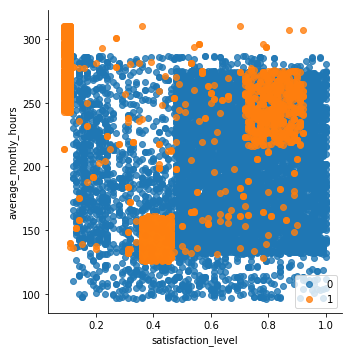

In [90]:
sns.lmplot( x="satisfaction_level", y="average_montly_hours", data=df, fit_reg=False, hue='left', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
#sns.plt.show()

# PART 5 - Plotting training vs Validation error(Categorical + Numerical Features)

## My Decision Tree

In [107]:
def error_with_depth(categorical_features, numerical_features, train_df, test_df, max_depth = 15):
    depth_cols = ['depth', 'train_error', 'validation_error']
    nodes_cols = ['node count', 'train_error', 'validation_error']
    depth_df = pd.DataFrame(columns = depth_cols)
    nodes_df = pd.DataFrame(columns = nodes_cols)
    for depth in range(1, max_depth+1):
        print("Depth: {0}".format(depth))
        dtree = DecisionTree(train_df, categorical_features, numerical_features, 'left', entropy, depth)
        node_count = count_nodes(dtree.root)
        dtree.test(train_df, 'left_predict')
        train_error = mean_squared_error(train_df['left'], train_df['left_predict'])
                       
        dtree.test(test_df, 'left_predict')
        test_error = mean_squared_error(test_df['left'], test_df['left_predict'])
        
        depth_df = depth_df.append(pd.DataFrame([[depth, train_error, test_error]], columns=depth_cols),ignore_index=True)
        nodes_df = nodes_df.append(pd.DataFrame([[node_count, train_error, test_error]], columns=nodes_cols),ignore_index=True)
        print(train_error, test_error)
    return (depth_df,nodes_df)

In [108]:
error = error_with_depth(categorical_features, numerical_features, X_train, X_val, 20)

Depth: 1
0.23804226918798665 0.23798932384341637
Depth: 2
0.18197997775305896 0.16814946619217083
Depth: 3
0.17797552836484984 0.17838078291814946
Depth: 4
0.05561735261401557 0.056494661921708184
Depth: 5
0.034593993325917685 0.03158362989323844
Depth: 6
0.026696329254727477 0.02402135231316726
Depth: 7
0.021579532814238044 0.023576512455516015
Depth: 8
0.016796440489432702 0.017348754448398576
Depth: 9
0.013236929922135706 0.017348754448398576
Depth: 10
0.009899888765294773 0.01601423487544484
Depth: 11
0.00778642936596218 0.015569395017793594
Depth: 12
0.005895439377085651 0.015124555160142349
Depth: 13
0.0052280311457174634 0.01601423487544484
Depth: 14
0.0032258064516129032 0.018238434163701068
Depth: 15
0.0017797552836484984 0.017348754448398576
Depth: 16
0.0004449388209121246 0.016903914590747332
Depth: 17
0.00011123470522803115 0.016459074733096084
Depth: 18
0.0 0.016459074733096084
Depth: 19
0.0 0.016459074733096084
Depth: 20
0.0 0.016459074733096084


### Errors with depth

(0.23804226918798665, 0.18197997775305896, 0.17797552836484984, 0.05561735261401557, 0.034593993325917685, 0.026696329254727477, 0.021579532814238044, 0.016796440489432702, 0.013236929922135706, 0.009899888765294773, 0.00778642936596218, 0.005895439377085651, 0.0052280311457174634, 0.0032258064516129032, 0.0017797552836484984, 0.0004449388209121246, 0.00011123470522803115, 0.0, 0.0, 0.0)


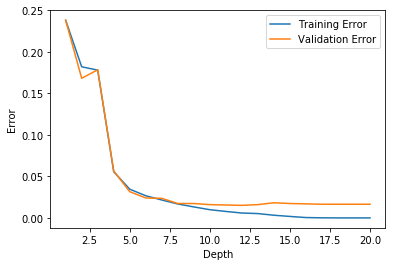

In [116]:
## Plotting Error with deoth
print(tuple(np.array(error[0]['train_error'])),)
y_depth = [tuple(np.array(error[0]['train_error'])), tuple(np.array(error[0]['validation_error']))]
x_depth = list(error[0]['depth'])

plt.plot(x_depth, y_depth[0], label='Training Error')
plt.plot(x_depth, y_depth[1], label='Validation Error')
plt.ylabel('Error')
plt.xlabel('Depth')
plt.legend()

### Errors with Node Count

(0.23804226918798665, 0.18197997775305896, 0.17797552836484984, 0.05561735261401557, 0.034593993325917685, 0.026696329254727477, 0.021579532814238044, 0.016796440489432702, 0.013236929922135706, 0.009899888765294773, 0.00778642936596218, 0.005895439377085651, 0.0052280311457174634, 0.0032258064516129032, 0.0017797552836484984, 0.0004449388209121246, 0.00011123470522803115, 0.0, 0.0, 0.0)


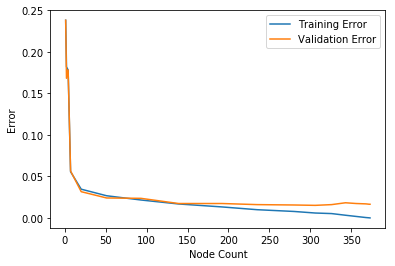

In [118]:
## Plotting Error with node count
print(tuple(np.array(error[1]['train_error'])),)
y = [tuple(np.array(error[1]['train_error'])), tuple(np.array(error[1]['validation_error']))]
x = list(error[1]['node count'])

plt.plot(x, y[0], label='Training Error')
plt.plot(x, y[1], label='Validation Error')
plt.ylabel('Error')
plt.xlabel('Node Count')
plt.legend()

## Errors from Scikit Learn Decision Tree

In [119]:
import sklearn
from sklearn import tree
        
def error_with_depth_scikit(categorical_features, numerical_features, train_df, test_df, max_depth = 15):
    cols_df = ['depth', 'train_error', 'validation_error']
    depth_df = pd.DataFrame(columns = cols_df)
    for depth in range(1,max_depth+1):
        print("Depth: {0}".format(depth))
        cols = categorical_features + numerical_features
        X = train_df[cols]
        Y = train_df['left']
        clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        clf = clf.fit(X, Y)
        
        predict_train = clf.predict(train_df[cols])
        train_error = mean_squared_error(train_df['left'], predict_train)
        
        predict_test= clf.predict(test_df[cols])
        test_error = mean_squared_error(test_df['left'], predict_test)
        
        depth_df = depth_df.append(pd.DataFrame([[depth, train_error, test_error]], columns=cols_df),ignore_index=True)
        print(train_error, test_error)
    return depth_df

In [120]:
error = error_with_depth_scikit(categorical_features, numerical_features, X_train, X_val, 20)

Depth: 1
0.18197997775305896 0.16814946619217083
Depth: 2
0.17797552836484984 0.17838078291814946
Depth: 3
0.05561735261401557 0.056494661921708184
Depth: 4
0.034593993325917685 0.03158362989323844
Depth: 5
0.0271412680756396 0.02491103202846975
Depth: 6
0.023581757508342602 0.022686832740213523
Depth: 7
0.020467185761957732 0.017348754448398576
Depth: 8
0.017352614015572858 0.018683274021352312
Depth: 9
0.015239154616240267 0.017793594306049824
Depth: 10
0.013348164627363738 0.018683274021352312
Depth: 11
0.012013348164627364 0.017793594306049824
Depth: 12
0.01067853170189099 0.016903914590747332
Depth: 13
0.008453837597330366 0.018238434163701068
Depth: 14
0.0064516129032258064 0.01912811387900356
Depth: 15
0.004560622914349277 0.018683274021352312
Depth: 16
0.0027808676307007787 0.02090747330960854
Depth: 17
0.0017797552836484984 0.02001779359430605
Depth: 18
0.0008898776418242492 0.02090747330960854
Depth: 19
0.0002224694104560623 0.02090747330960854
Depth: 20
0.0001112347052280311

### Errors with Depth

(0.18197997775305896, 0.17797552836484984, 0.05561735261401557, 0.034593993325917685, 0.0271412680756396, 0.023581757508342602, 0.020467185761957732, 0.017352614015572858, 0.015239154616240267, 0.013348164627363738, 0.012013348164627364, 0.01067853170189099, 0.008453837597330366, 0.0064516129032258064, 0.004560622914349277, 0.0027808676307007787, 0.0017797552836484984, 0.0008898776418242492, 0.0002224694104560623, 0.00011123470522803115)


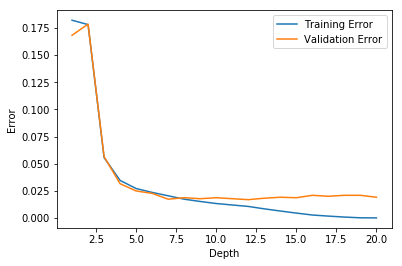

In [121]:
print(tuple(np.array(error['train_error'])),)
y = [tuple(np.array(error['train_error'])), tuple(np.array(error['validation_error']))]
x = list(error['depth'])

plt.plot(x, y[0], label='Training Error')
plt.plot(x, y[1], label='Validation Error')
plt.ylabel('Error')
plt.xlabel('Depth')
plt.legend()

         
# for xe, ye in zip(x, y):
#     plt.scatter([xe] * len(ye), ye)
# plt.plot(list(error['depth']), [tuple(np.array(error['train_error'])), tuple(np.array(error['validation_error']))])

# PART - 6

In decision Tree, missing values can be handled directly while testing.
### Algorithm:
1. Traverse the decision tree normally and if at any point, the node attribute value in the test data is missing, recursiely traverse all the sub branches to get the count of the unique output labels.
2. While traversing the subbranches, if at any point there is some data in the test set that can be used, use it to traverse only 1 branch rather than all the branches, this way we use all the information available and get a better prediction
3. Output the label which has the maximum count